# Gala Groceries

## Business Understanding
Gala Groceries is a technology-led grocery store chain based in the USA. They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. Gala Groceries want to know how to better stock the items that they sell.

This is a high-level business problem and will require a dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
data = pd.read_csv("/content/sample_sales_data.csv")
data

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


* It is visible that the Unnamed: 0 column is similar to the index and thus can be made into one

In [ ]:
# Setting an index colum
data.set_index("Unnamed: 0", inplace=True)

In [ ]:
# Getting information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


* The data has a total of 9 variable factors / columns and a total of 7,829 rows of data

In [ ]:
# Checking for missing data
data.isna().any().sum()

0

* It is seen that there are no missing values in the dataset


In [ ]:
# Checking for duplicated values
data.duplicated().sum()

0

* It is seen that there are no duplicataed data entries in the dataset.
* It can therefore be said that the data is clean

In [ ]:
# Getting a description of the data
data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


* ut can be seen that the data has a mean unit price of 7.82 for 2.5 quantity and 19.71 as total
* The mean price is 5.29 with a minimum of 0.2 and a maximum mean of 24.

## Exploratory Data Analysis

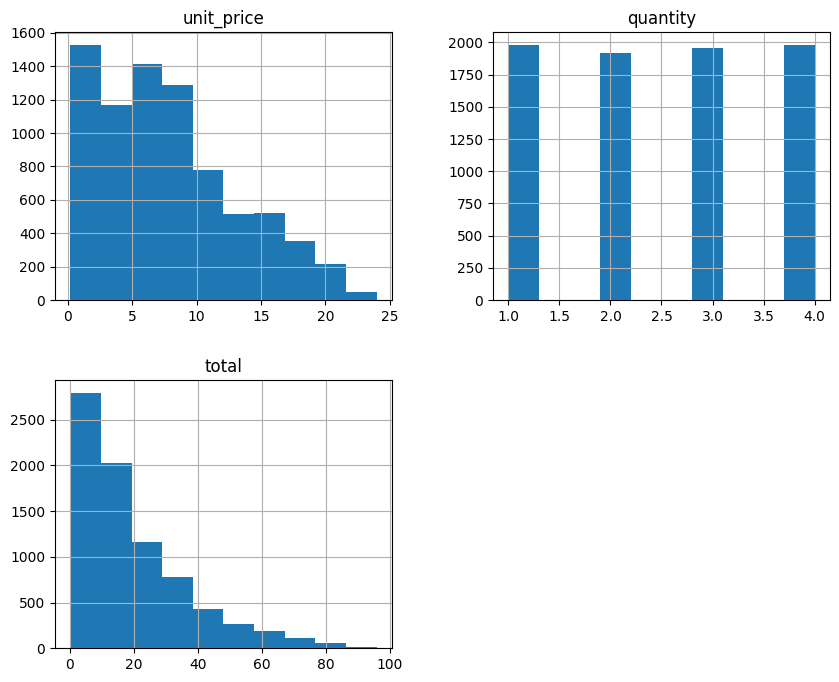

In [ ]:
# Histogram of numerical columns
data.hist(figsize=(10, 8))
plt.show()

* From the above visualizations, it is seen that the description is consistent with the findings of the distributions in the three factors of unit_price, quantity and totals

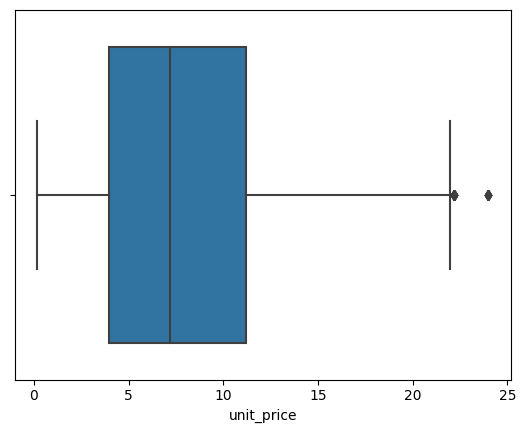

In [ ]:
# Boxplot for numerical columns
sns.boxplot(data=data, x='unit_price')
plt.show()

* The boxplot above shows that the unit_price has two values that seem very far from the mean and median and can be considered outliers. These are relevant to know as there is a chance to determine thereason for the expense.

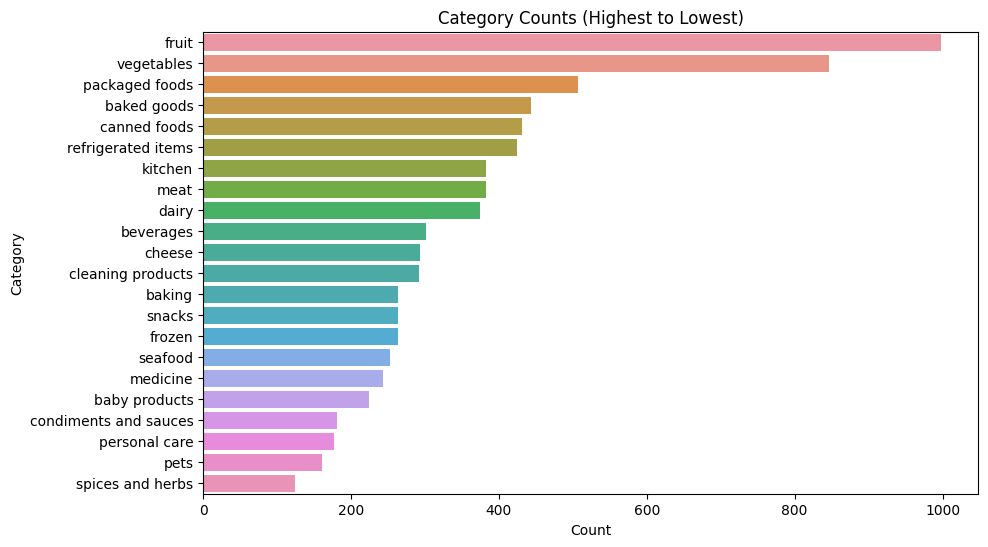

In [ ]:
# Count the occurrences of each category
category_counts = data['category'].value_counts()

# Sort the categories by count in descending order
category_counts = category_counts.sort_values(ascending=False)

# Create a horizontal countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, y='category', order=category_counts.index)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Counts (Highest to Lowest)')
plt.show()


In [ ]:
# Grouping by a categorical column and calculating mean
data.groupby('category')['total'].mean()

# Aggregating data
data.groupby('customer_type').agg({'total': 'sum', 'quantity': 'mean'})


,total,quantity
customer_type,,
basic,29569.16,2.486239
gold,29939.99,2.499011
non-member,31755.24,2.483448
premium,31655.68,2.510692
standard,31388.78,2.527900


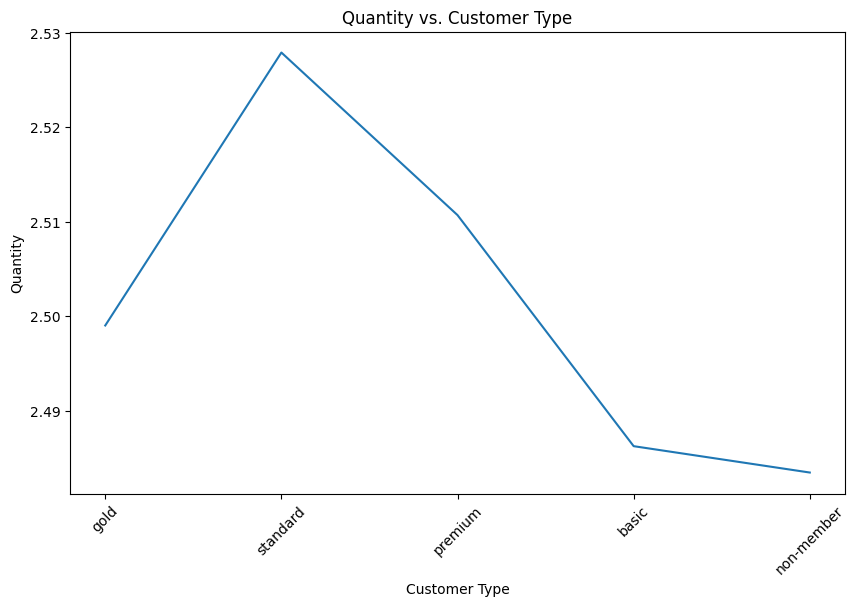

In [ ]:
# Create a line plot for quantity vs. customer type
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=data, x='customer_type', y='quantity', errorbar=None)  # ci=None to remove confidence intervals
plt.xlabel('Customer Type')
plt.ylabel('Quantity')
plt.title('Quantity vs. Customer Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


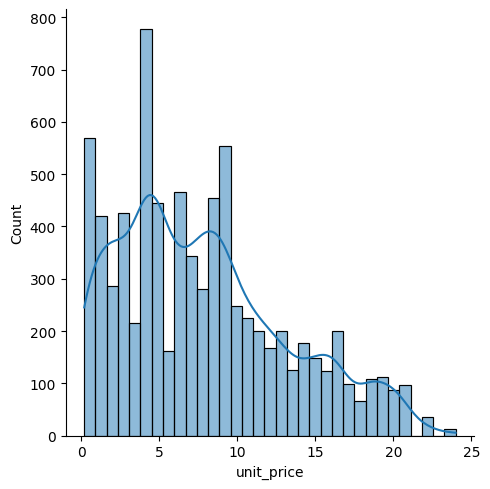

In [ ]:
# Checking data distribution
sns.displot(data['unit_price'], kind='hist', kde=True)
plt.show()

# Identifying outliers
Q1 = data['unit_price'].quantile(0.25)
Q3 = data['unit_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['unit_price'] < lower_bound) | (data['unit_price'] > upper_bound)]


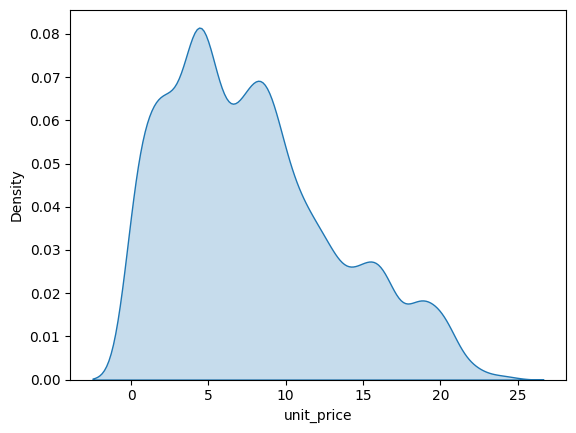

In [ ]:
# Checking data distribution
sns.kdeplot(data['unit_price'], fill=True)
plt.show()


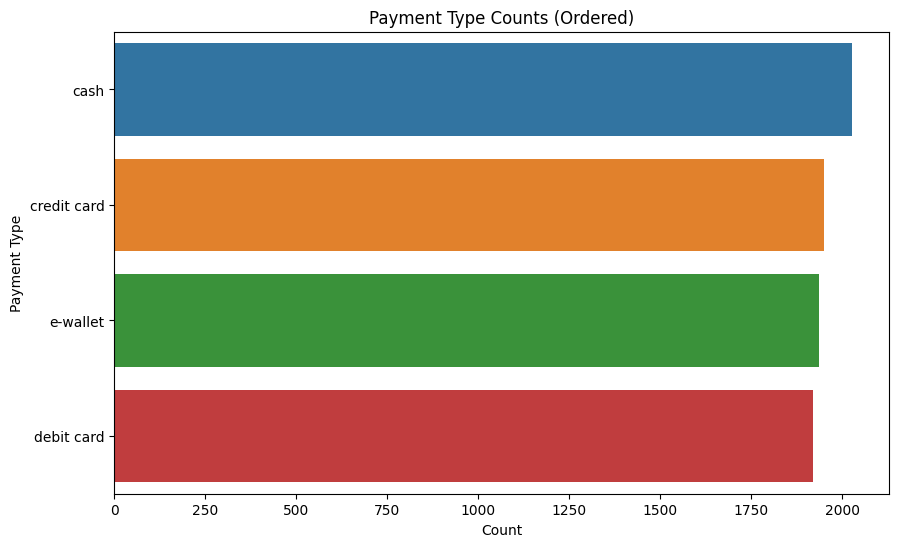

In [ ]:
# Count the occurrences of each payment type and order them
payment_counts = data['payment_type'].value_counts().sort_values(ascending=False)

# Create a horizontal countplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, y='payment_type', order=payment_counts.index)
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.title('Payment Type Counts (Ordered)')
plt.show()


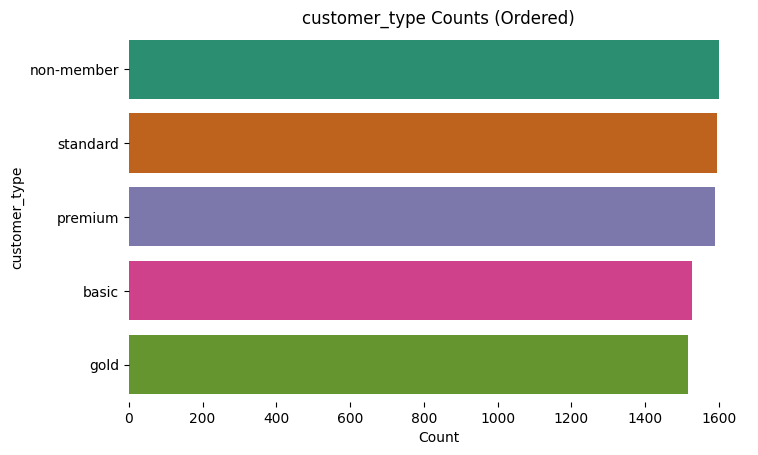

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    # Count the occurrences of each category and order them
    category_counts = df[colname].value_counts().sort_values(ascending=False)

    # Create a horizontal barplot
    plt.figure(figsize=(8 * figscale, 4.8 * figscale))
    sns.barplot(y=category_counts.index, x=category_counts.values, palette=sns.color_palette(mpl_palette_name))
    plt.xlabel('Count')
    plt.ylabel(colname)
    plt.title(f'{colname} Counts (Ordered)')
    sns.despine(left=True, bottom=True)
    plt.show()

categorical_histogram(data, 'customer_type')


> From the above obsewrvations it is clear that:

* The best commodities to stock in are fruits and vegetables with the least favorable being herbs and spices
* The distribution of the types of customers does not differ much but most are non-membe customers with the least being gold customers
* It is also visible that most customers pay with cash and credit cards as opposed to other methods

>> * From the information above it is best for Gala Groceries is to stock according to the distribution in the category counts. The grocery store would benefit from stocking goods suuch as fruits, vegetables and packages goods and less on spices, herbs and pets or personal and pets